# Books Recommendation System

### Read the dataset with the necessary features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
books = pd.read_csv(r'C:\Users\Edward Korir\Downloads\books_dataset\BX_Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
users = pd.read_csv(r'C:\Users\Edward Korir\Downloads\books_dataset\BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']
ratings = pd.read_csv(r'C:\Users\Edward Korir\Downloads\books_dataset\BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

C:\Users\Edward Korir\AppData\Local\Temp\ipykernel_45256\974894492.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books = pd.read_csv(r'C:\Users\Edward Korir\Downloads\books_dataset\BX_Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
C:\Users\Edward Korir\AppData\Local\Temp\ipykernel_45256\974894492.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  users = pd.read_csv(r'C:\Users\Edward Korir\Downloads\books_dataset\BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
C:\Users\Edward Korir\AppData\Local\Temp\ipykernel_45256\974894492.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  ratings = pd.read_csv(r'C:\Users\Edward Korir\Downloads\books_dataset\BX-Book-Ratings.cs

In [4]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
users.head()

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
print(ratings.shape)
print(list(ratings.columns))

(1149780, 3)
['userID', 'ISBN', 'bookRating']


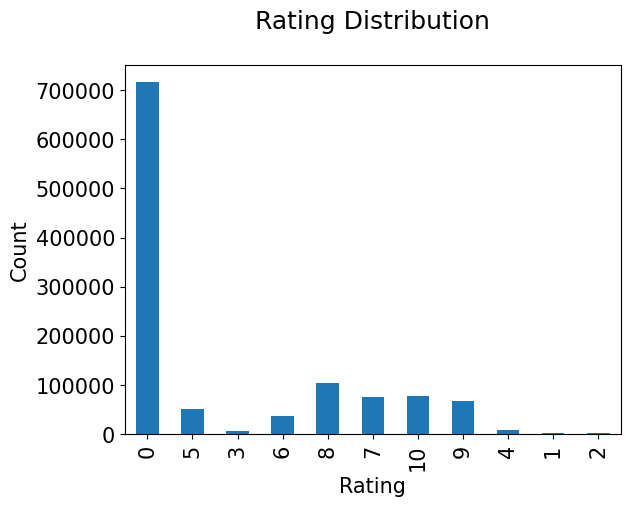

In [15]:
plt.rc("font", size=15)
ratings['bookRating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()

In [9]:
print(books.shape)
print(list(books.columns))

(271379, 8)
['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


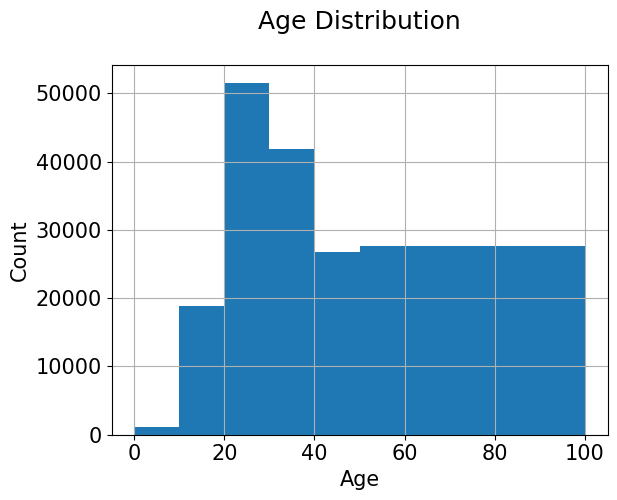

In [16]:
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('system2.png', bbox_inches='tight')
plt.show()

### Recommendations Based on Rating Counts

In [19]:
rating_count = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())
rating_count.sort_values('bookRating', ascending=False)

,bookRating
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723
...,...
0801064090,1
0801064252,1
0801064279,1


Book with ISBN 0971880107 has the highest rating count

Let's determine which book it is:

In [22]:
books[books['ISBN'] == '0971880107']['bookTitle']

26    Wild Animus
Name: bookTitle, dtype: object

In [25]:
list(rating_count.sort_values('bookRating', ascending=False).head().index)

['0971880107', '0316666343', '0385504209', '0060928336', '0312195516']

In [27]:
# most rated books
books[books['ISBN'].isin(list(rating_count.sort_values('bookRating', ascending=False).head().index))]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
26,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
408,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
522,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...
748,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...


### Recommendations based on correlations

We use Pearson's correlation to measure the linear correlation between two variables in our case, the ratings for two books.

First, we need to find out the average rating, and the number if ratings each book received.

In [33]:
average_rating = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].mean())
average_rating['ratingCount'] = ratings.groupby('ISBN')['bookRating'].count()
average_rating.sort_values('ratingCount', ascending=False).head()

,bookRating,ratingCount
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


Observations: In this dataset, the book that received the most ratings caounts was not highly rated as well. As a result, if we were to user recommenndations based on rating counts, we would definitely make mistakes here. So, we need to have a better system.

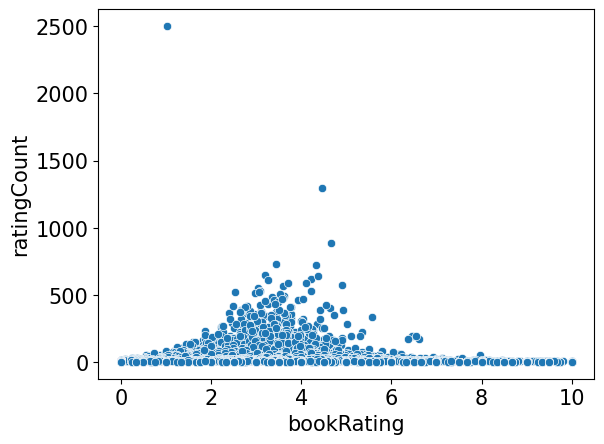

In [36]:
import seaborn as sns
sns.scatterplot(x='bookRating', y='ratingCount', data = average_rating)
plt.show()

### To ensure statistical significance, users with less that 200 ratings, and books with less that 100 ratings are excluded

In [46]:
counts1 = ratings['userID'].value_counts()
ratings = ratings[ratings['userID'].isin(counts1[counts1 >= 200].index)]
counts = ratings['bookRating'].value_counts()
ratings = ratings[ratings['bookRating'].isin(counts[counts >= 100].index)]

### Rating matrix

We convert the ratings table to a 2D matrix. The matrix will be sparsr because not every user rated every book

In [47]:
ratings.pivot(index='userID', columns='ISBN')

bookRating                                                  \
ISBN    0330299891  0375404120  0586045007  9022906116  9032803328   
userID                                                               
254            NaN         NaN         NaN         NaN         NaN   
2276           NaN         NaN         NaN         NaN         NaN   
2766           NaN         NaN         NaN         NaN         NaN   
2977           NaN         NaN         NaN         NaN         NaN   
3363           NaN         NaN         NaN         NaN         NaN   
...            ...         ...         ...         ...         ...   
275970         NaN         NaN         NaN         NaN         NaN   
277427         NaN         NaN         NaN         NaN         NaN   
277478         NaN         NaN         NaN         NaN         NaN   
277639         NaN         NaN         NaN         NaN         NaN   
278418         NaN         NaN         NaN         NaN         NaN   

                                                                    ...  \
ISBN    9044922564  9044922572  9044922718  9044923161  904492401X  ...   
userID                                                              ...   
254            NaN         NaN         NaN         NaN         NaN  ...   
2276           NaN         NaN         NaN         NaN         NaN  ...   
2766           NaN         NaN         NaN         NaN         NaN  ...   
2977           NaN         NaN         NaN         NaN         NaN  ...   
3363           NaN         NaN         NaN         NaN         NaN  ...   
...            ...         ...         ...         ...         ...  ...   
275970         NaN         NaN         NaN         NaN         NaN  ...   
277427         NaN         NaN         NaN         NaN         NaN  ...   
277478         NaN         NaN         NaN         NaN         NaN  ...   
277639         NaN         NaN         NaN         NaN         NaN  ...   
278418         NaN         NaN         NaN         NaN         NaN  ...   

                                                                          \
ISBN   UNGRANDHOMMED X000000000 YOUTELLEM,AND ZR903CX0003 \0432534220\""   
userID                                                                     
254              NaN        NaN           NaN         NaN            NaN   
2276             NaN        NaN           NaN         NaN            NaN   
2766             NaN        NaN           NaN         NaN            NaN   
2977             NaN        NaN           NaN         NaN            NaN   
3363             NaN        NaN           NaN         NaN            NaN   
...              ...        ...           ...         ...            ...   
275970           NaN        NaN           NaN         NaN            NaN   
277427           NaN        NaN           NaN         NaN            NaN   
277478           NaN        NaN           NaN         NaN            NaN   
277639           NaN        NaN           NaN         NaN            NaN   
278418           NaN        NaN           NaN         NaN            NaN   

                                                              
ISBN   \2842053052\"" b00005wz75 cn108465 cn113107 Ô½crosoft  
userID                                                        
254               NaN        NaN      NaN      NaN       NaN  
2276              NaN        NaN      NaN      NaN       NaN  
2766              NaN        NaN      NaN      NaN       NaN  
2977              NaN        NaN      NaN      NaN       NaN  
3363              NaN        NaN      NaN      NaN       NaN  
...               ...        ...      ...      ...       ...  
275970            NaN        NaN      NaN      NaN       NaN  
277427            NaN        NaN      NaN      NaN       NaN  
277478            NaN        NaN      NaN      NaN       NaN  
277639            NaN        NaN      NaN      NaN       NaN  
278418            NaN        NaN      NaN      NaN       NaN  

[905 rows x 207699 columns]

In [48]:
ratings_pivot = ratings.pivot(index='userID', columns='ISBN').bookRating
userID = ratings_pivot.index
ISBN = ratings_pivot.columns
print(ratings_pivot.shape)
ratings_pivot.head()

(905, 207699)


ISBN,0330299891,0375404120,0586045007,9022906116,9032803328,9044922564,9044922572,9044922718,9044923161,904492401X,...,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\0432534220\""""","\2842053052\""""",b00005wz75,cn108465,cn113107,Ô½crosoft
userID,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# sample a specific book and find books that strongy correlate with it
books[books['ISBN'] == '0316666343']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
408,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...


In [51]:
bones_rating = ratings_pivot['0316666343']
similar_to_bones = ratings_pivot.corrwith(bones_rating)

C:\Users\Edward Korir\anaconda3\envs\analytics\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Edward Korir\anaconda3\envs\analytics\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [52]:
similar_to_bones

ISBN
 0330299891      NaN
 0375404120      NaN
 0586045007      NaN
 9022906116      NaN
 9032803328      NaN
                  ..
\2842053052\""   NaN
b00005wz75       NaN
cn108465         NaN
cn113107         NaN
Ô½crosoft        NaN
Length: 207699, dtype: float64

In [53]:
corr_bones = pd.DataFrame(similar_to_bones, columns=['pearsonR'])
corr_bones.dropna(inplace=True)
corr_bones

,pearsonR
ISBN,
0002005018,0.000000
0002184974,1.000000
0002250810,1.000000
000225929X,1.000000
0006127754,-1.000000
...,...
9728605161,0.409644
B00005W8DZ,1.000000
B00009EF82,1.000000


In [55]:
corr_summary = corr_bones.join(average_rating['ratingCount'])
corr_summary[corr_summary['ratingCount'] >= 300].sort_values('pearsonR', ascending=False).head(10)

,pearsonR,ratingCount
ISBN,,
0316666343,1.000000,1295
0312291639,0.471872,354
0316601950,0.434248,568
0446610038,0.429712,391
0446672211,0.421478,585
0385265700,0.351635,319
0345342968,0.316922,321
0060930535,0.309860,494
0375707972,0.308145,354


In [59]:
list(corr_summary[corr_summary['ratingCount'] >= 300].sort_values('pearsonR', ascending=False).head(10).index)[1:]

['0312291639',
 '0316601950',
 '0446610038',
 '0446672211',
 '0385265700',
 '0345342968',
 '0060930535',
 '0375707972',
 '0684872153']

In [63]:
books[books['ISBN'].isin(list(corr_summary[corr_summary['ratingCount'] >= 300].sort_values('pearsonR', ascending=False).head(10).index)[1:])]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
706,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...
1373,0060930535,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...
1702,0375707972,The Reader,Bernhard Schlink,1999,Vintage Books USA,http://images.amazon.com/images/P/0375707972.0...,http://images.amazon.com/images/P/0375707972.0...,http://images.amazon.com/images/P/0375707972.0...
1863,0446610038,1st to Die: A Novel,James Patterson,2002,Warner Vision,http://images.amazon.com/images/P/0446610038.0...,http://images.amazon.com/images/P/0446610038.0...,http://images.amazon.com/images/P/0446610038.0...
2230,0345342968,Fahrenheit 451,RAY BRADBURY,1987,Del Rey,http://images.amazon.com/images/P/0345342968.0...,http://images.amazon.com/images/P/0345342968.0...,http://images.amazon.com/images/P/0345342968.0...
2536,0385265700,The Book of Ruth (Oprah's Book Club (Paperback)),Jane Hamilton,1990,Anchor,http://images.amazon.com/images/P/0385265700.0...,http://images.amazon.com/images/P/0385265700.0...,http://images.amazon.com/images/P/0385265700.0...
2849,0312291639,The Nanny Diaries: A Novel,Emma McLaughlin,2003,St. Martin's Griffin,http://images.amazon.com/images/P/0312291639.0...,http://images.amazon.com/images/P/0312291639.0...,http://images.amazon.com/images/P/0312291639.0...
4578,0684872153,Angela's Ashes (MMP) : A Memoir,Frank McCourt,1999,Scribner,http://images.amazon.com/images/P/0684872153.0...,http://images.amazon.com/images/P/0684872153.0...,http://images.amazon.com/images/P/0684872153.0...
4824,0316601950,The Pilot's Wife : A Novel,Anita Shreve,1999,Back Bay Books,http://images.amazon.com/images/P/0316601950.0...,http://images.amazon.com/images/P/0316601950.0...,http://images.amazon.com/images/P/0316601950.0...


***

# Collaborative Filtering Using k-Nearest Neighbors (kNN)

kNN is a machine learning algorithm to find clusters of similar users based on common book ratings, and make predictions using the average rating of top-k nearest neighbors. For example, we first present ratings in a matrix with the matrix having one row for each item (book) and one column for each user,

In [64]:
ratings.head()

,userID,ISBN,bookRating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [65]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [66]:
combine_book_rating = pd.merge(ratings, books, on='ISBN')
columns = ['yearOfPublication', 'publisher', 'bookAuthor', 'imageUrlS', 'imageUrlM', 'imageUrlL']
combine_book_rating = combine_book_rating.drop(columns, axis=1)
combine_book_rating.head()

,userID,ISBN,bookRating,bookTitle
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...


In [67]:
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['bookTitle'])

book_ratingCount = (combine_book_rating.
     groupby(by = ['bookTitle'])['bookRating'].
     count().
     reset_index().
     rename(columns = {'bookRating': 'totalRatingCount'})
     [['bookTitle', 'totalRatingCount']]
    )
book_ratingCount.head()

,bookTitle,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


We combine the rating data with the total rating count data, this gives us exactly what we need to find out which books are popular and filter out lesser-known books.

In [68]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'bookTitle', right_on = 'bookTitle', how = 'left')
rating_with_totalRatingCount.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


In [69]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

count   160587.000
mean         3.044
std          7.428
min          1.000
25%          1.000
50%          1.000
75%          2.000
max        365.000
Name: totalRatingCount, dtype: float64


The median book has been rated only once. Let’s look at the top of the distribution

In [80]:
np.arange(.9, 1, .001)

array([0.9  , 0.901, 0.902, 0.903, 0.904, 0.905, 0.906, 0.907, 0.908,
       0.909, 0.91 , 0.911, 0.912, 0.913, 0.914, 0.915, 0.916, 0.917,
       0.918, 0.919, 0.92 , 0.921, 0.922, 0.923, 0.924, 0.925, 0.926,
       0.927, 0.928, 0.929, 0.93 , 0.931, 0.932, 0.933, 0.934, 0.935,
       0.936, 0.937, 0.938, 0.939, 0.94 , 0.941, 0.942, 0.943, 0.944,
       0.945, 0.946, 0.947, 0.948, 0.949, 0.95 , 0.951, 0.952, 0.953,
       0.954, 0.955, 0.956, 0.957, 0.958, 0.959, 0.96 , 0.961, 0.962,
       0.963, 0.964, 0.965, 0.966, 0.967, 0.968, 0.969, 0.97 , 0.971,
       0.972, 0.973, 0.974, 0.975, 0.976, 0.977, 0.978, 0.979, 0.98 ,
       0.981, 0.982, 0.983, 0.984, 0.985, 0.986, 0.987, 0.988, 0.989,
       0.99 , 0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998,
       0.999])

In [83]:
book_ratingCount['totalRatingCount'].quantile(np.arange(.95, 1.001, .001))

0.950    10.000
0.951    10.000
0.952    10.000
0.953    10.000
0.954    10.000
0.955    10.000
0.956    11.000
0.957    11.000
0.958    11.000
0.959    11.000
0.960    11.000
0.961    12.000
0.962    12.000
0.963    12.000
0.964    12.000
0.965    13.000
0.966    13.000
0.967    13.000
0.968    13.000
0.969    14.000
0.970    14.000
0.971    15.000
0.972    15.000
0.973    15.000
0.974    16.000
0.975    16.000
0.976    17.000
0.977    17.000
0.978    18.000
0.979    19.000
0.980    19.000
0.981    20.000
0.982    21.000
0.983    22.000
0.984    23.000
0.985    24.000
0.986    25.000
0.987    26.000
0.988    28.000
0.989    29.000
0.990    31.000
0.991    33.000
0.992    36.000
0.993    39.000
0.994    42.484
0.995    47.000
0.996    53.000
0.997    62.000
0.998    76.828
0.999    99.000
1.000   365.000
Name: totalRatingCount, dtype: float64

In [78]:
# focus on books that have a rating greater than 50
popularity_threshold = 50
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


In [88]:
len(rating_popular_book),rating_popular_book.shape

(62149, (62149, 5))

### Filter to users in US and Canada only

In [89]:
combined = rating_popular_book.merge(users, left_on = 'userID', right_on = 'userID', how = 'left')

us_canada_user_rating = combined[combined['Location'].str.contains("usa|canada")]
us_canada_user_rating=us_canada_user_rating.drop('Age', axis=1)
us_canada_user_rating.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount,Location
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"gilbert, arizona, usa"
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"knoxville, tennessee, usa"
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"byron, minnesota, usa"
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"cordova, tennessee, usa"
5,16795,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"mechanicsville, maryland, usa"


## Implementing kNN

We convert our table to a 2D matrix, and fill the missing values with zeros (since we will calculate distances between rating vectors). We then transform the values(ratings) of the matrix dataframe into a scipy sparse matrix for more efficient calculations.

Finding the Nearest Neighbors We use unsupervised algorithms with sklearn.neighbors. The algorithm we use to compute the nearest neighbors is “brute”, and we specify “metric=cosine” so that the algorithm will calculate the cosine similarity between rating vectors. Finally, we fit the model.

In [90]:
from scipy.sparse import csr_matrix
us_canada_user_rating = us_canada_user_rating.drop_duplicates(['userID', 'bookTitle'])
us_canada_user_rating_pivot = us_canada_user_rating.pivot(index = 'bookTitle', columns = 'userID', values = 'bookRating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [92]:
query_index = np.random.choice(ratings_pivot.shape[0])
print(query_index)

675


In [93]:
us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1,-1)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 7., 0., 0., 0., 0., 0., 8., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 8., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 8., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [97]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
query_index = 655
print(query_index)
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

655


In [98]:
us_canada_user_rating_pivot.index[query_index]

'The Summerhouse'

In [99]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for The Summerhouse:

1: Miss Julia Speaks Her Mind : A Novel, with distance of 0.7319015561178213:
2: Dream Country, with distance of 0.7388349914155329:
3: Unspeakable, with distance of 0.7415487922518107:
4: The Smoke Jumper, with distance of 0.779693788214397:
5: Irish Hearts, with distance of 0.7833773016226391:
